# Nama : Harun Al Rasyid
## NIM : M0119040


Permasalahan : Apakah kita dapat melihat user yang memiliki aktivitas menggunakan *gofood* terbanyak ? 

**kumpulan pertanyaan** :
- Bagaimana cara menghitung frekuensi seseorang menggunakan aplikasi gofood?
- Dengan melihat frekuensi, apakah kita dapat identitas/id orang tersebut?

### **Cleansing Dataset**

In [1]:
import pandas as pd
import math as mt
import statistics as st

In [160]:
df = pd.read_csv("/Users/harun/Kulyah/SMT_5/Data_Sains/Materi/pandas_journey/mydata/food_delivery_datasets.csv")
a = df.drop(columns=["random_id"])
b = a["rating"].fillna(0)
c = mt.ceil(st.mean(b))
d =a.fillna({"rating":c})
d

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,3.0,9000,742618303,Completed
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,3.0,4000,742604875,Completed
...,...,...,...,...,...,...,...,...,...,...
1071,FOOD-10921,0,2018-09-20T15:01:52.152828,900,103200,1296335,5.0,4000,742742150,Completed
1072,FOOD-10265,5000,2018-07-26T14:43:23.655294,1579,145700,1135466,5.0,7000,742566851,Completed
1073,FOOD-10534,0,2018-08-21T20:10:59.283185,2606,177200,1383625,3.0,15000,742571888,Completed
1074,FOOD-10158,0,2018-07-16T14:42:23.214427,2428,49300,1094787,5.0,9000,742725064,Completed


In [217]:
e = d.loc[(d.status == "Completed")&(d.duplicated("cust_id"))]
banyak_order_suka=len(e) #banyaknya orderan yang diorder oleh orang yang sama
banyak_orang_suka=len(e.cust_id.unique()) #banyaknya orang yang mengorder secara berkala
e

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status
9,FOOD-10942,0,2018-09-21T22:51:22.145050,1580,80800,511038,3.0,11000,742541172,Completed
11,FOOD-10909,5000,2018-09-19T13:35:35.612145,2149,79200,1089034,5.0,2000,742594125,Completed
13,FOOD-10141,0,2018-07-14T17:57:45.108952,2514,339800,366528,5.0,13000,742538990,Completed
15,FOOD-10436,0,2018-08-11T18:20:00.835032,1760,74800,1319474,5.0,10000,742531018,Completed
16,FOOD-10978,4000,2018-09-23T14:18:37.731404,1204,33100,1163202,5.0,0,742531705,Completed
...,...,...,...,...,...,...,...,...,...,...
1071,FOOD-10921,0,2018-09-20T15:01:52.152828,900,103200,1296335,5.0,4000,742742150,Completed
1072,FOOD-10265,5000,2018-07-26T14:43:23.655294,1579,145700,1135466,5.0,7000,742566851,Completed
1073,FOOD-10534,0,2018-08-21T20:10:59.283185,2606,177200,1383625,3.0,15000,742571888,Completed
1074,FOOD-10158,0,2018-07-16T14:42:23.214427,2428,49300,1094787,5.0,9000,742725064,Completed


### Menghitung banyaknya orang 

In [39]:
h=d.loc[d.duplicated('cust_id')]
len(h)

938

In [5]:
banyak_orang_cancelled =len(a.cust_id.unique())-banyak_orang_suka
print(banyak_orang_cancelled)

16


In [218]:
ee = e.pivot_table(columns=['cust_id'],aggfunc='size').sort_values(ascending=False).reset_index().rename(columns= {0:"frekuensi"})
ee.loc[ee["frekuensi"]==26]
print(ee)

     cust_id  frekuensi
0    1094787         26
1     366721         24
2     316834         24
3     366528         23
4     697545         20
..       ...        ...
117   185161          1
118   297674          1
119  1205633          1
120  1294885          1
121   861950          1

[122 rows x 2 columns]


### **Data Visualization**

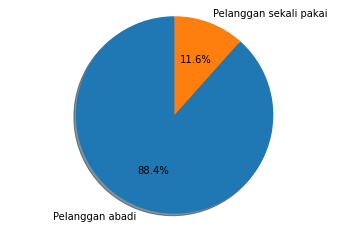

In [175]:
import matplotlib.pyplot as plt

labels = "Pelanggan abadi", "Pelanggan sekali pakai"
sizes = [banyak_orang_suka,banyak_orang_cancelled]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()